
# ADASYN


An illustration of the Adaptive Synthetic Sampling Approach for Imbalanced
Learning ADASYN method.




Automatically created module for IPython interactive environment


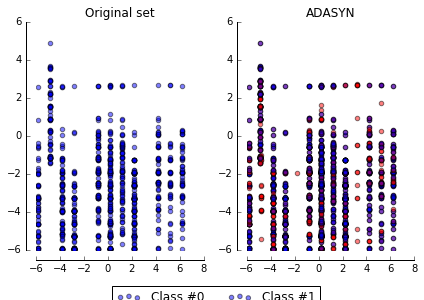

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN

print(__doc__)

dataset1 = pd.read_excel("/home/ale/Scrivania/dropout_IA/files/data.xlsx")
dataset = dataset1.drop(columns = ["ID_studente", "Voto_scuola_sup", "Situazione_OFA"] )
dataset.head()
X = dataset.drop('Abbandoni', axis=1)
y = dataset['Abbandoni']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ada = ADASYN(random_state=2,sampling_strategy={1:8000}, n_neighbors=5)
X_resampled, y_resampled = ada.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')


ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5,c='red')
ax2.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5,c='red')
ax2.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax2.set_title('ADASYN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0., bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()